### 1.创新性的案例
#### 完成课程实践的基础上，重新自己起一个Notebook，有创新点
#### 基于LangChain+ChatGLM3的本地知识库问答



### 实验目的：

实现了一个基于LangChain+ChatGLM3的本地知识库问答，本地知识库支持txt、md、pdf、jpg文档格式|。并且开发了Gradio界面，可以通过public URL访问网页。自己编写了一个流聊天生成方法generate_text()，支持调用本地自定义模型，使得生成答案有逐字生成的效果。

### 效果展示

#### 1.不使用流聊天方式直接生成答案的Gradio界面

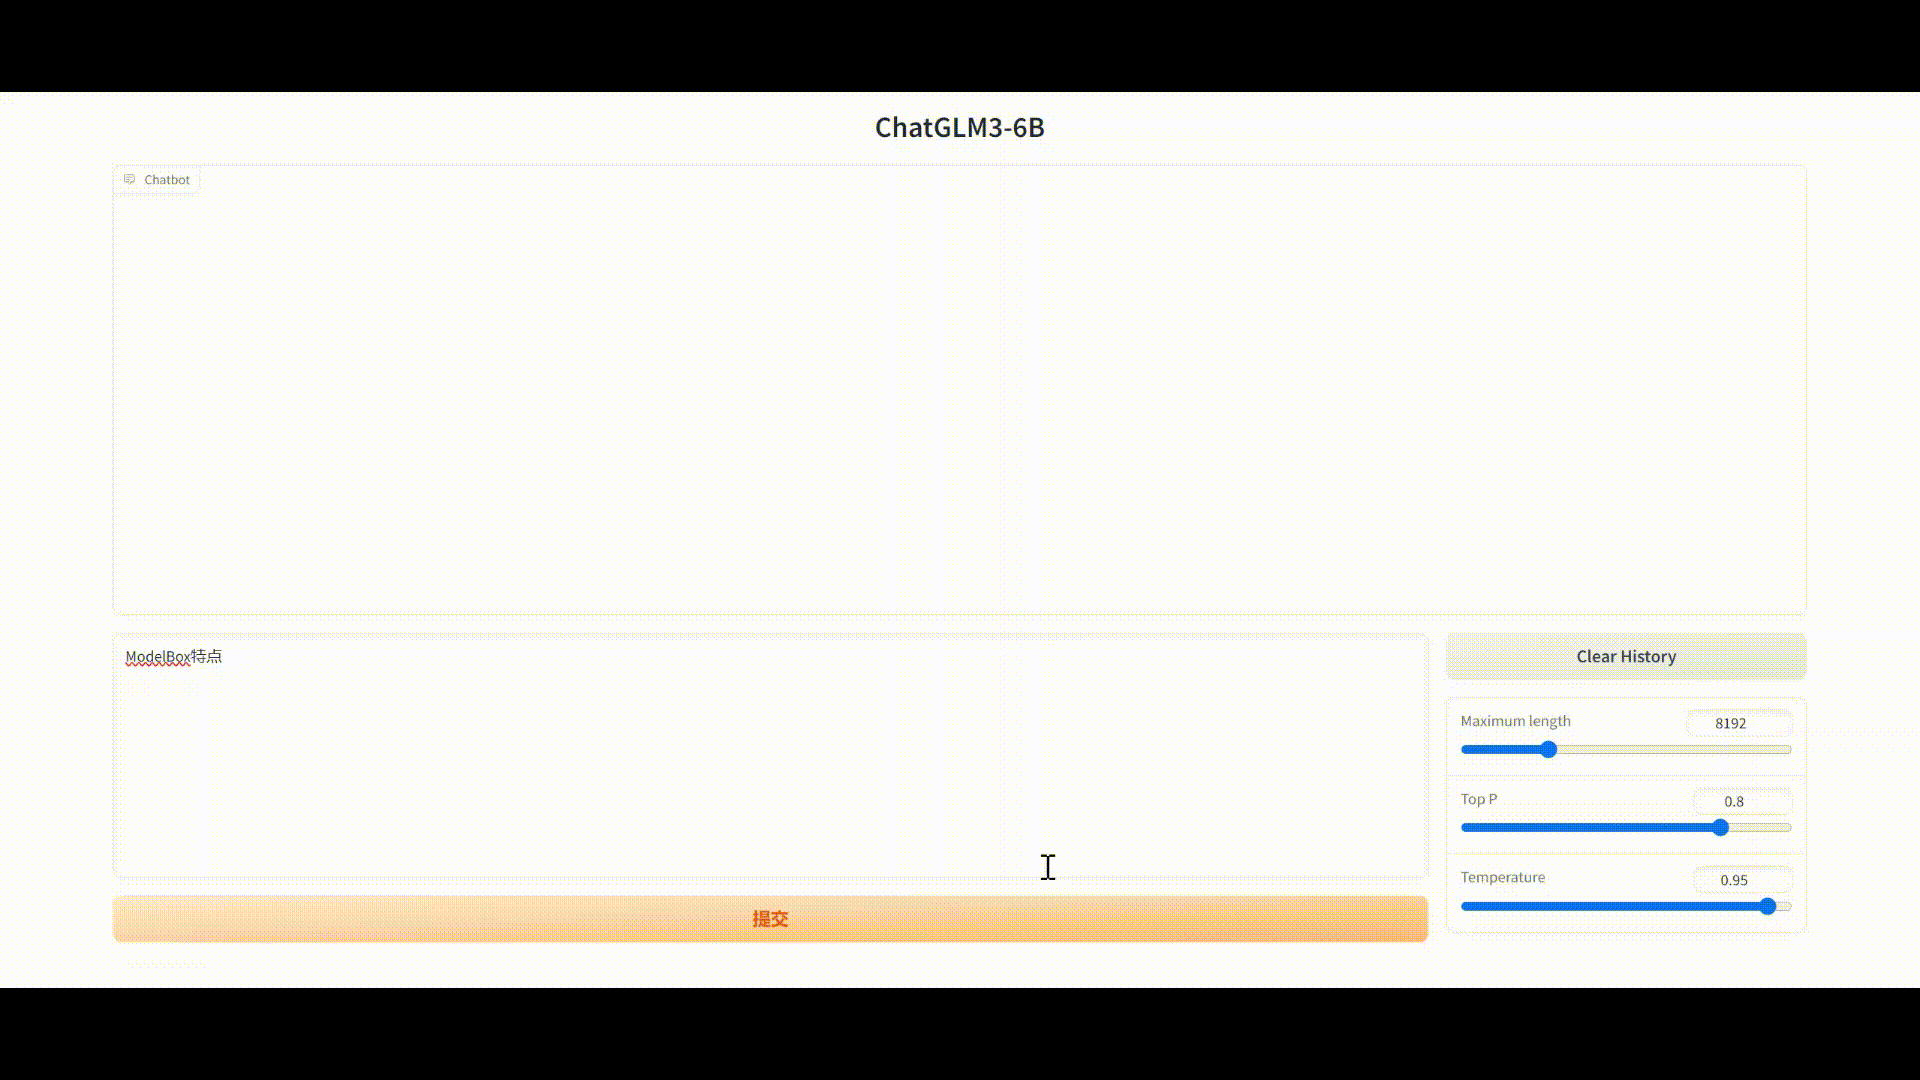

#### 2.使用流聊天方式生成的答案的Gradio界面

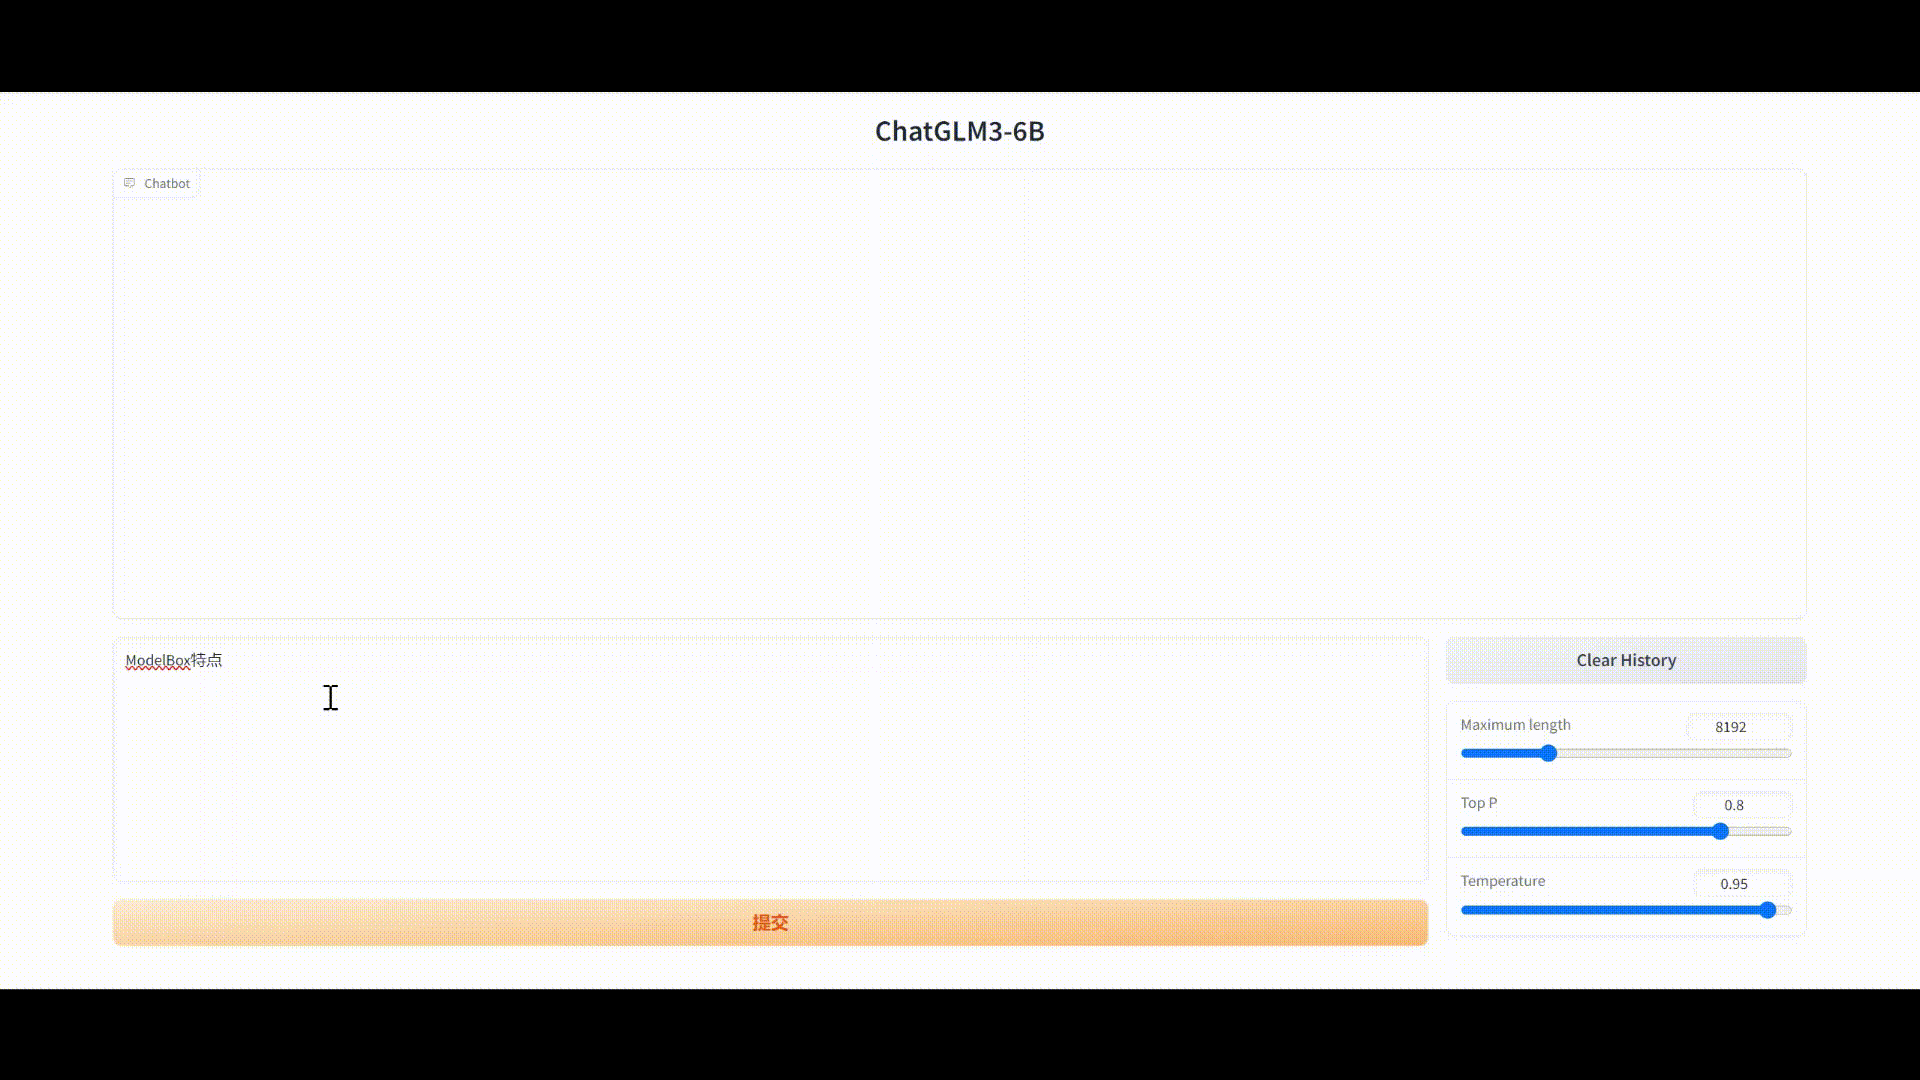

## 2. 案例体验
🔹 本案例需使用 P100 及以上规格运行，请确保运行规格一致，可按照下图切换规格。

![](https://modelarts-labs-bj4-v2.obs.cn-north-4.myhuaweicloud.com/case_zoo/chatglm3/image/1.png)

🔹 点击Run in ModelArts，将会进入到ModelArts CodeLab中，这时需要你登录华为云账号，如果没有账号，则需要注册一个，且要进行实名认证，参考[《ModelArts准备工作_简易版》](https://developer.huaweicloud.com/develop/aigallery/article/detail?id=4ce709d6-eb25-4fa4-b214-e2e5d6b7919c) 即可完成账号注册和实名认证。 登录之后，等待片刻，即可进入到CodeLab的运行环境

🔹 出现 Out Of Memory ，请检查是否为您的参数配置过高导致，修改参数配置，重启kernel或更换更高规格资源进行规避❗❗❗

#### 2.1 下载ChatGLM3模型

In [2]:
import os
import moxing as mox

# #拷贝chatglm3模型到chatglm3-6b目录下
work_dir = '/home/ma-user/work'
obs_path = 'obs://dtse-models/tar-models/chatglm3-6b.tar'
ma_path = os.path.join(work_dir, 'chatglm3-6b.tar')
mox.file.copy(obs_path, ma_path)

mox.file.copy_parallel('obs://modelarts-labs-bj4-v2/case_zoo/langchain-ChatGLM/file/service','service' )
mox.file.copy_parallel('obs://modelarts-labs-bj4-v2/course/ModelBox/frpc_linux_amd64', '/home/ma-user/work/frpc_linux_amd64_v0.2')


INFO:root:Using MoXing-v2.1.0.5d9c87c8-5d9c87c8
INFO:root:Using OBS-Python-SDK-3.20.9.1


进入chatglm3目录，解压模型压缩包

In [2]:
os.chdir(work_dir)
!pwd
!tar -xvf chatglm3-6b.tar

/home/ma-user/work
chatglm3-6b/
chatglm3-6b/.gitattributes
chatglm3-6b/MODEL_LICENSE
chatglm3-6b/README.md
chatglm3-6b/config.json
chatglm3-6b/configuration_chatglm.py
chatglm3-6b/modeling_chatglm.py
chatglm3-6b/pytorch_model-00001-of-00007.bin
chatglm3-6b/pytorch_model-00002-of-00007.bin
chatglm3-6b/pytorch_model-00003-of-00007.bin
chatglm3-6b/pytorch_model-00004-of-00007.bin
chatglm3-6b/pytorch_model-00005-of-00007.bin
chatglm3-6b/pytorch_model-00006-of-00007.bin
chatglm3-6b/pytorch_model-00007-of-00007.bin
chatglm3-6b/pytorch_model.bin.index.json
chatglm3-6b/quantization.py
chatglm3-6b/tokenization_chatglm.py
chatglm3-6b/tokenizer.model
chatglm3-6b/tokenizer_config.json


下载nltk_data数据

In [3]:
import os
import moxing as mox

work_dir = '/home/ma-user/work'
obs_path = 'obs://dtse-models/tar-models/nltk_data.tar'
ma_path = os.path.join(work_dir, 'nltk_data.tar')
mox.file.copy(obs_path, ma_path)

mox.file.copy_parallel('obs://modelarts-labs-bj4-v2/case_zoo/langchain-ChatGLM/file/docs','/home/ma-user/work/docs')

进入nltk_data目录，解压数据压缩包

In [4]:
os.chdir(work_dir)
!pwd
!tar -xvf nltk_data.tar

/home/ma-user/work
nltk_data/
nltk_data/misc/
nltk_data/misc/mwa_ppdb.zip
nltk_data/misc/perluniprops.xml
nltk_data/misc/mwa_ppdb.xml
nltk_data/misc/perluniprops.zip
nltk_data/tokenizers/
nltk_data/tokenizers/punkt/
nltk_data/tokenizers/punkt/french.pickle
nltk_data/tokenizers/punkt/polish.pickle
nltk_data/tokenizers/punkt/.DS_Store
nltk_data/tokenizers/punkt/portuguese.pickle
nltk_data/tokenizers/punkt/german.pickle
nltk_data/tokenizers/punkt/swedish.pickle
nltk_data/tokenizers/punkt/malayalam.pickle
nltk_data/tokenizers/punkt/estonian.pickle
nltk_data/tokenizers/punkt/finnish.pickle
nltk_data/tokenizers/punkt/spanish.pickle
nltk_data/tokenizers/punkt/PY3/
nltk_data/tokenizers/punkt/PY3/french.pickle
nltk_data/tokenizers/punkt/PY3/polish.pickle
nltk_data/tokenizers/punkt/PY3/portuguese.pickle
nltk_data/tokenizers/punkt/PY3/german.pickle
nltk_data/tokenizers/punkt/PY3/swedish.pickle
nltk_data/tokenizers/punkt/PY3/malayalam.pickle
nltk_data/tokenizers/punkt/PY3/estonian.pickle
nltk_data

下载text2vec-large-chinese模型，用于中文通用语义匹配

In [2]:
import os
import moxing as mox

work_dir = '/home/ma-user/work'

obs_path = 'obs://dtse-models/tar-models/text2vec-large-chinese.tar'
ma_path = os.path.join(work_dir, 'text2vec-large-chinese.tar')
mox.file.copy(obs_path, ma_path)

进入text2vec-large-chinese目录，解压模型压缩包

In [3]:
os.chdir(work_dir)
!pwd
!tar -xvf text2vec-large-chinese.tar

/home/ma-user/work
text2vec-large-chinese/
text2vec-large-chinese/.gitattributes
text2vec-large-chinese/README.md
text2vec-large-chinese/config.json
text2vec-large-chinese/eval_results.txt
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/blobs/
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/blobs/eaf5cb71c0eeab7db3c5171da504e5867b3f67a78e07bdba9b52d334ae35adb3.lock
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/refs/
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/refs/main
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/snapshots/
text2vec-large-chinese/models--GanymedeNil--text2vec-large-chinese/snapshots/064717f2acfd7253bea91079d59b82e50b58c886/
text2vec-large-chinese/pytorch_model.bin
text2vec-large-chinese/special_tokens_map.json
text2vec-large-chinese/tmpqlu9nxcm
text2vec-large-chinese/tokenizer.json
text2vec-large-chi

### 2.2 配置环境

本案例依赖Python3.10.10及以上环境，因此我们首先创建虚拟环境：

In [3]:
!/home/ma-user/anaconda3/bin/conda create -n python-3.10.10 python=3.10.10 -y --override-channels --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
!/home/ma-user/anaconda3/envs/python-3.10.10/bin/pip install ipykernel

/home/ma-user/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/ma-user/anaconda3/envs/python-3.10.10

  added / updated specs:
    - python=3.10.10


The following NEW packages will be INSTALLED:

  _libgcc_mutex      anaconda/pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      anaconda/pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu
  bzip2              anaconda/pkgs/main/linux-64::bzip2-1.0.8-h7b6447c_0
  ca-certificates    anaconda/pkgs/main/linux-64::ca-certificates-2023.12.12-h06a4308_0
  ld_impl_linux-64   anaconda/pkgs/main/linux-64::ld_impl_linux-64-2.38-h1181459_1
  libffi             anaconda/pkgs/main/linux-64::libffi-3.4.4-h6a678d5_0
  libgcc-ng

In [5]:
import json
import os

data = {
   "display_name": "python-3.10.10",
   "env": {
      "PATH": "/home/ma-user/anaconda3/envs/python-3.10.10/bin:/home/ma-user/anaconda3/envs/python-3.7.10/bin:/modelarts/authoring/notebook-conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/anaconda3/envs/PyTorch-1.8/bin"
   },
   "language": "python",
   "argv": [
      "/home/ma-user/anaconda3/envs/python-3.10.10/bin/python",
      "-m",
      "ipykernel",
      "-f",
      "{connection_file}"
   ]
}

if not os.path.exists("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/"):
    os.mkdir("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/")

with open('/home/ma-user/anaconda3/share/jupyter/kernels/python-3.10.10/kernel.json', 'w') as f:
    json.dump(data, f, indent=4)

### 2.3 安装依赖库

In [1]:
!pip install transformers==4.30.2
!pip install sentencepiece==0.1.99
!pip install torch==2.0.1
!pip install markdown==3.4.3
!pip install faiss-gpu==1.7.2
!pip install langchain==0.0.329 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install nltk==3.8.1 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install unstructured==0.10.24 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install sentence-transformers==2.2.2
!pip install gradio==3.39 mdtex2html -i https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host pypi.tuna.tsinghua.edu.cn
!cp /home/ma-user/work/frpc_linux_amd64_v0.2 /home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/gradio/frpc_linux_amd64_v0.2
!chmod +x /home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/gradio/frpc_linux_amd64_v0.2

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
  Using cached http://repo.myhuaweicloud.com/repository/pypi/packages/5b/0b/e45d26ccd28568013523e04f325432ea88a442b4e3020b757cf4361f0120/transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached http://repo.myhuaweicloud.com/repository/pypi/packages/00/45/ec3407adf6f6b5bf867a4462b2b0af27597a26bd3cd6e2534cb6ab029938/filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cached http://repo.myhuaweicloud.com/repository/pypi/packages/a0/0a/02ac0ae1047d97769003ff4fb8e6717024f3f174a5d13257415aa09e13d9/huggingface_hub-0.20.1-py3-none-any.whl (330 kB)
  Using cached http://repo.myhuaweicloud.com/repository/pypi/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached http://repo.myhuaweicloud.com/repository/pypi/packages/29/61/bf33c6c85c55bc45a29eee3195848ff2d518d84735eb0e2d8cb42e0d285e/PyYAML-6.0.1-cp310-cp310

In [2]:
%pip install rapidocr_onnxruntime pdf2image pdfminer.six  -i https://pypi.tuna.tsinghua.edu.cn/simple 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 57.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 97.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 50.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 89.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
     ━━

## 3. 代码开发

In [1]:
from langchain.chains import RetrievalQA
from langchain.prompts.prompt import PromptTemplate

from service.config import LangChainCFG
from service.chatglm_service import ChatGLMService
# from service.chatglm_service import ChatGLMService,ChatGLMForConditionalGeneration
from service.knowledge_service import KnowledgeService


class LangChainApplication(object):
    #初始化，加载ChatGLM3模型和本地知识库
    def __init__(self,config):
        self.config = config
        self.llm_service = ChatGLMService()
        self.llm_service.load_model(model_name_or_path=self.config.llm_model_path)
        self.knowledge_service = KnowledgeService(config)
    #获取大语言模型返回的答案（基于本地知识库查询）
    def get_knowledeg_based_answer(self,query,
                                  history_len=5,
                                  temperature=0.1,
                                  top_p=0.9,
                                  top_k=4,
                                  chat_history=[]):
        #定义查询的提示模板格式：
        prompt_template = """
基于以下已知信息，简洁和专业的来回答用户的问题。
如果无法从中得到答案，请说 "根据已知信息无法回答该问题" 或 "没有提供足够的相关信息"，不允许在答案中添加编造成分，答案请使用中文。
已知内容:
{context}
问题:
{question}
    """
        prompt = PromptTemplate(template=prompt_template,
                            input_variables=["context", "question"])
        self.llm_service.history = chat_history[-history_len:] if history_len>0 else []
        self.llm_service.temperature = temperature
        self.llm_service.top_p = top_p
        
        #利用预先存在的语言模型、检索器来创建并初始化BaseRetrievalQA类的实例
        knowledge_chain = RetrievalQA.from_llm(
        llm = self.llm_service,
        #基于本地知识库构建一个检索器，并仅返回top_k的结果
        retriever = self.knowledge_service.knowledge_base.as_retriever(
        search_kwargs={"k":top_k}),
        prompt = prompt)
        #combine_documents_chain的作用是将查询返回的文档内容（page_content）合并到一起作为prompt中context的值
        #将combine_documents_chain的合并文档内容改为{page_content}
        
        knowledge_chain.combine_documents_chain.document_prompt = PromptTemplate(
        input_variables=["page_content"],template="{page_content}")
        
        #返回结果中是否包含源文档
        knowledge_chain.return_source_documents = True
        
        #传入问题内容进行查询
        result = knowledge_chain({"query":query})
        return result
    
    #获取大语言模型返回的答案（未基于本地知识库查询）
    def get_llm_answer(self,query):
        result = self.llm_service._call(query)
        return result
    
    
    

/home/ma-user/anaconda3/envs/python-3.10.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from service.config import LangChainCFG

config = LangChainCFG()
application = LangChainApplication(config)

result = application.get_llm_answer('ModelBox是什么')
print('\nresult of llm:\n')
print(result)
print('\n#############################################\n')

application.knowledge_service.init_knowledge_base()
result2 = application.get_knowledeg_based_answer('ModelBox是什么')
print('\n############################################\n')
print('\nresult of knowledge base:\n')
print(result2)

Loading checkpoint shards: 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]
No sentence-transformers model found with name /home/ma-user/work/text2vec-large-chinese. Creating a new one with MEAN pooling.



result of llm:

ModelBox是一个基于Web的建模平台，它允许用户创建、编辑和分享各种类型的模型，包括数据模型、机器学习模型、业务流程模型等。ModelBox旨在为用户提供一个易于使用的界面，以便他们可以快速地创建和管理模型，而无需深入了解代码或复杂的建模技术。通过ModelBox，用户可以轻松地将模型部署到生产环境中，并与其他人共享和协作。ModelBox的主要特点是易于使用、功能丰富、灵活性和可扩展性。

#############################################


#####init_knowledge_base#####

modelbox.jpg
modelbox.pdf
modelbox.txt
第一个应用.md

############################################


result of knowledge base:

{'query': 'ModelBox是什么', 'result': 'ModelBox是一个AI应用开发平台，提供了一种快速、高效、灵活的方式，让开发者能够构建、部署和管理AI应用。ModelBox具有以下特点：\n\n1. 基于云的AI平台，可以轻松地进行模型训练和部署。\n2. 提供了丰富的开发工具和库，包括Python、TensorFlow、PyTorch等热门AI框架。\n3. 支持多种硬件平台，包括CPU、GPU、TPU等。\n4. 支持多种操作系统，包括Windows、Linux、macOS等。\n5. 提供了一套完整的AI应用开发流程，包括数据预处理、模型训练、模型部署、模型优化等。\n\nModelBox的应用开发流程如下：\n\n1. 确定应用需求，包括输入数据、输出数据、模型类型等。\n2. 选择合适的开发工具和库，包括Python、TensorFlow、PyTorch等。\n3. 在ModelBox平台上构建AI应用，包括数据预处理、模型训练、模型部署等。\n4. 进行模型优化和调试，以提高模型性能和准确度。\n5. 将模型部署到目标硬件平台上，并进行测试和验证。\n6. 完成应用开发和部署，并进行维护和更新。\n\nModelBox可以帮助开发者快速构建、部署和管理AI应用，提高AI应用的开发效率和性能。', 'so

In [2]:
# 编写Gradio调用函数,开发Gradio界面

import mdtex2html
from service.config import LangChainCFG
from service.configuration_chatglm import ChatGLMConfig


#将文本中的字符转为网页上可以支持的字符，避免被误认为是HTML标签
def parse_text(text):
    lines = text.split("\n")
    lines = [line for line in lines if line != ""]
    count = 0
    for i, line in enumerate(lines):
        if "```" in line:
            count += 1
            items = line.split('`')
            if count % 2 == 1:
                lines[i] = f'<pre><code class="language-{items[-1]}">'
            else:
                lines[i] = f'<br></code></pre>'
        else:
            if i > 0:
                if count % 2 == 1:
                    line = line.replace("`", "\`")
                    line = line.replace("<", "&lt;")
                    line = line.replace(">", "&gt;")
                    line = line.replace(" ", "&nbsp;")
                    line = line.replace("*", "&ast;")
                    line = line.replace("_", "&lowbar;")
                    line = line.replace("-", "&#45;")
                    line = line.replace(".", "&#46;")
                    line = line.replace("!", "&#33;")
                    line = line.replace("(", "&#40;")
                    line = line.replace(")", "&#41;")
                    line = line.replace("$", "&#36;")
                lines[i] = "<br>"+line
    text = "".join(lines)
    return text

#采用流聊天方式（stream_chat）调用ChatGLM模型，使得生成答案有逐字生成的效果
# def predict(input, chatbot, max_length, top_p, temperature, history, past_key_values):
#     chatbot.append((parse_text(input), parse_text(input)))
#     for response, history, past_key_values in model.stream_chat(tokenizer, input, history, past_key_values=past_key_values,
#                                                                 return_past_key_values=True,
#                                                                 max_length=max_length, top_p=top_p,
#                                                                 temperature=temperature):
#         chatbot[-1] = (parse_text(input), parse_text(response))

#         yield chatbot, history, past_key_values

# 在这里定义 application
config = LangChainCFG()
application = LangChainApplication(config)

#1.#采用流聊天方式（stream_chat）调用本地自定义模型，使得生成答案有逐字生成的效果

def generate_text(input_text, max_length, top_p, temperature, history, past_key_values):
    application.knowledge_service.init_knowledge_base()
    # chatbot.append((parse_text(input_text), parse_text(input_text)))

    response_dict = application.get_knowledeg_based_answer(parse_text(input_text), history_len=5, temperature=0.1, top_p=0.9, top_k=4, chat_history=history)
    
    if 'result' in response_dict and isinstance(response_dict['result'], str):
        result_text = response_dict['result']
        response = parse_text(result_text)

        # 逐字生成
        generated_text = ''
        for char in response:
            generated_text += char
            yield generated_text, history, past_key_values
    else:
        yield None, history, past_key_values



def predict(input_text, chatbot, max_length, top_p, temperature, history, past_key_values):
    # 调用generate_text方法
    chatbot.append((parse_text(input_text), parse_text(input_text)))
    for generated_text, history, past_key_values in generate_text(input_text, max_length, top_p, temperature, history, past_key_values):
        if generated_text:
            result_text = generated_text
            response = parse_text(result_text)
            chatbot[-1] = (parse_text(input_text), response)
            yield chatbot, history, past_key_values
        else:
            yield chatbot, history, past_key_values
            

#2.不采用流聊天方式，直接生成答案

# def predict(input_text, chatbot, max_length, top_p, temperature, history, past_key_values):
#     application.knowledge_service.init_knowledge_base()
#     chatbot.append((parse_text(input_text), parse_text(input_text)))
  
    
#     response_dict = application.get_knowledeg_based_answer(parse_text(input_text), history_len=5, temperature=0.1, top_p=0.9, top_k=4, chat_history=history)
#     if 'result' in response_dict and isinstance(response_dict['result'], str):
#         result_text = response_dict['result']
#         response = parse_text(result_text)
#         chatbot[-1] = (parse_text(input_text), response)
#         yield chatbot, history, past_key_values
#     else:
        
#         yield chatbot, history, past_key_values
    

#去除输入框的内容
def reset_user_input():
    return gr.update(value='')

#清除状态
def reset_state():
    return [], [], None

Loading checkpoint shards: 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]
No sentence-transformers model found with name /home/ma-user/work/text2vec-large-chinese. Creating a new one with MEAN pooling.


In [3]:
#运行Gradio界面，运行成功后点击“Running on public URL”后的网页链接即可体验
import gradio as gr


with gr.Blocks() as demo:
    gr.HTML("""<h1 align="center">ChatGLM3-6B</h1>""")

    chatbot = gr.Chatbot()
    with gr.Row():
        with gr.Column(scale=4):
            with gr.Column(scale=12):
                user_input = gr.Textbox(show_label=False, placeholder="Input...", lines=10,container=False)
            with gr.Column(min_width=32, scale=1):
                submitBtn = gr.Button("Submit", variant="primary")
        with gr.Column(scale=1):
            emptyBtn = gr.Button("Clear History")
            max_length = gr.Slider(0, 32768, value=8192, step=1.0, label="Maximum length", interactive=True)
            top_p = gr.Slider(0, 1, value=0.8, step=0.01, label="Top P", interactive=True)
            temperature = gr.Slider(0, 1, value=0.95, step=0.01, label="Temperature", interactive=True)

    history = gr.State([])
    past_key_values = gr.State(None)

    submitBtn.click(predict, [user_input, chatbot, max_length, top_p, temperature, history, past_key_values],
                    [chatbot, history, past_key_values], show_progress=True)
    submitBtn.click(reset_user_input, [], [user_input])

    emptyBtn.click(reset_state, outputs=[chatbot, history, past_key_values], show_progress=True)

demo.queue().launch(share=True, inbrowser=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://49fd085613e083798b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



#####init_knowledge_base#####

modelbox.jpg
modelbox.pdf
modelbox.txt
第一个应用.md
